In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [8]:
ads = pd.read_csv('OAIT.csv')
ads.head()

,Week,Campaign,Ad group,Keyword type,Search Keyword,Currency,Clicks,Impressions,Cost ($),Leads,Prospects,Payment ($),Payment Date,Country
0,25-Jan-21,EK_Generic_Swimming,Pool_Reservation_System_Exact,Exact,pool reservation system,USD,2,17,38.33,0,1,$980,03-Feb-21,USA
1,25-Jan-21,EK_Generic_Swimming,Pool_Booking_App_Exact,Exact,pool booking app,USD,1,13,11.70,0,0,NaN,NaN,USA
2,25-Jan-21,EK_Generic_Quad-Tok_Yoga,Yoga_Studio_Booking_Software_Broad,Broad,yoga studio booking software,USD,4,154,45.13,0,1,"$1,188",13-Mar-21,USA
3,25-Jan-21,EK_Generic_Swimming,Pool_Scheduling_Software_Phrase,Phrase,pool scheduling software,USD,2,8,23.91,0,0,NaN,NaN,USA
4,25-Jan-21,EK_Generic_Swimming_UK,Pool_Reservation_Software_Broad,Broad,pool reservation software,USD,2,13,4.89,0,0,NaN,NaN,USA


## Checking for missing values

In [9]:
ads.isnull().sum()

Week                0
Campaign            0
Ad group            0
Keyword type        0
Search Keyword      0
Currency            0
Clicks              0
Impressions         0
Cost ($)            0
Leads               0
Prospects           0
Payment ($)       410
Payment Date      410
Country             0
dtype: int64

## We Find that there are 410 missing values in both Payment and Payment Date
## While analysing the data we find that both payment and payment date are irrelevant to the objective to be solved. 
## Hence we drop the columns having the most number of missing values

In [14]:
ads.drop(columns ={'Payment ($)','Payment Date'},inplace = True)

In [15]:
ads.head()

,Week,Campaign,Ad group,Keyword type,Search Keyword,Currency,Clicks,Impressions,Cost ($),Leads,Prospects,Country
0,25-Jan-21,EK_Generic_Swimming,Pool_Reservation_System_Exact,Exact,pool reservation system,USD,2,17,38.33,0,1,USA
1,25-Jan-21,EK_Generic_Swimming,Pool_Booking_App_Exact,Exact,pool booking app,USD,1,13,11.70,0,0,USA
2,25-Jan-21,EK_Generic_Quad-Tok_Yoga,Yoga_Studio_Booking_Software_Broad,Broad,yoga studio booking software,USD,4,154,45.13,0,1,USA
3,25-Jan-21,EK_Generic_Swimming,Pool_Scheduling_Software_Phrase,Phrase,pool scheduling software,USD,2,8,23.91,0,0,USA
4,25-Jan-21,EK_Generic_Swimming_UK,Pool_Reservation_Software_Broad,Broad,pool reservation software,USD,2,13,4.89,0,0,USA


## Now we check for columns that are irrelevant to the objective

In [16]:
ads.Currency.unique()

array(['USD'], dtype=object)

In [17]:
ads.Country.unique()

array(['USA'], dtype=object)

In [18]:
ads.drop(columns={'Currency','Country'},inplace = True)

In [19]:
ads.head()

,Week,Campaign,Ad group,Keyword type,Search Keyword,Clicks,Impressions,Cost ($),Leads,Prospects
0,25-Jan-21,EK_Generic_Swimming,Pool_Reservation_System_Exact,Exact,pool reservation system,2,17,38.33,0,1
1,25-Jan-21,EK_Generic_Swimming,Pool_Booking_App_Exact,Exact,pool booking app,1,13,11.70,0,0
2,25-Jan-21,EK_Generic_Quad-Tok_Yoga,Yoga_Studio_Booking_Software_Broad,Broad,yoga studio booking software,4,154,45.13,0,1
3,25-Jan-21,EK_Generic_Swimming,Pool_Scheduling_Software_Phrase,Phrase,pool scheduling software,2,8,23.91,0,0
4,25-Jan-21,EK_Generic_Swimming_UK,Pool_Reservation_Software_Broad,Broad,pool reservation software,2,13,4.89,0,0


In [22]:
#Renaimg the relevant columns for convenience 

ads.rename(columns={'Ad group':'Ad_group','Keyword type':'Keyword_type','Search Keyword':'Search_keyword','Cost ($)':'Cost'},inplace =True)


In [23]:
ads.head()

,Week,Campaign,Ad_group,Keyword_type,Search_keyword,Clicks,Impressions,Cost,Leads,Prospects
0,25-Jan-21,EK_Generic_Swimming,Pool_Reservation_System_Exact,Exact,pool reservation system,2,17,38.33,0,1
1,25-Jan-21,EK_Generic_Swimming,Pool_Booking_App_Exact,Exact,pool booking app,1,13,11.70,0,0
2,25-Jan-21,EK_Generic_Quad-Tok_Yoga,Yoga_Studio_Booking_Software_Broad,Broad,yoga studio booking software,4,154,45.13,0,1
3,25-Jan-21,EK_Generic_Swimming,Pool_Scheduling_Software_Phrase,Phrase,pool scheduling software,2,8,23.91,0,0
4,25-Jan-21,EK_Generic_Swimming_UK,Pool_Reservation_Software_Broad,Broad,pool reservation software,2,13,4.89,0,0


## To know the profit of channel wise we have to calculate CTR ( Click Through Rate ) and CPC ( Cost Per Click )

## CTR = ( Clicks / Impression )*100
## CPC = Cost / Clicks

In [24]:
c = ads['Clicks']
i = ads['Impressions']
ads['CTR']= (c/i)*100
ads.head()

,Week,Campaign,Ad_group,Keyword_type,Search_keyword,Clicks,Impressions,Cost,Leads,Prospects,CTR
0,25-Jan-21,EK_Generic_Swimming,Pool_Reservation_System_Exact,Exact,pool reservation system,2,17,38.33,0,1,11.764706
1,25-Jan-21,EK_Generic_Swimming,Pool_Booking_App_Exact,Exact,pool booking app,1,13,11.70,0,0,7.692308
2,25-Jan-21,EK_Generic_Quad-Tok_Yoga,Yoga_Studio_Booking_Software_Broad,Broad,yoga studio booking software,4,154,45.13,0,1,2.597403
3,25-Jan-21,EK_Generic_Swimming,Pool_Scheduling_Software_Phrase,Phrase,pool scheduling software,2,8,23.91,0,0,25.000000
4,25-Jan-21,EK_Generic_Swimming_UK,Pool_Reservation_Software_Broad,Broad,pool reservation software,2,13,4.89,0,0,15.384615


In [32]:
co = ads['Cost']
ads['CPC']= co/c
ads.head()

,Week,Campaign,Ad_group,Keyword_type,Search_keyword,Clicks,Impressions,Cost,Leads,Prospects,CTR,CPC
0,25-Jan-21,EK_Generic_Swimming,Pool_Reservation_System_Exact,Exact,pool reservation system,2,17,38.33,0,1,11.764706,19.1650
1,25-Jan-21,EK_Generic_Swimming,Pool_Booking_App_Exact,Exact,pool booking app,1,13,11.70,0,0,7.692308,11.7000
2,25-Jan-21,EK_Generic_Quad-Tok_Yoga,Yoga_Studio_Booking_Software_Broad,Broad,yoga studio booking software,4,154,45.13,0,1,2.597403,11.2825
3,25-Jan-21,EK_Generic_Swimming,Pool_Scheduling_Software_Phrase,Phrase,pool scheduling software,2,8,23.91,0,0,25.000000,11.9550
4,25-Jan-21,EK_Generic_Swimming_UK,Pool_Reservation_Software_Broad,Broad,pool reservation software,2,13,4.89,0,0,15.384615,2.4450


## We have now found out CPC and CTR from the given data.

## The Higher the CTR, the more profitable the channel is.

## The Lower the CPC , the better performance of the channel.

## We can check for null values in the newly added columns.

In [27]:
ads.isnull().sum()

Week                0
Campaign            0
Ad_group            0
Keyword_type        0
Search_keyword      0
Clicks              0
Impressions         0
Cost                0
Leads               0
Prospects           0
CTR                64
CPC               263
dtype: int64

## We find that there are 64 missing values in CTR and 263 values missing in CPC. 

In [29]:
ads.shape

(418, 12)

## Since CTR and CPC are calculated based on the datas from Clicks, cost and impressions , we have to find the null values in those columns as well.

## Since we have the missing values of CTR and CPC in Nan format , we are changing it to 0

In [34]:
ads['CTR']= ads['CTR'].replace(np.nan, 0)

In [35]:
ads['CPC']= ads['CPC'].replace(np.nan, 0)

In [37]:
ads.isnull().sum()

Week              0
Campaign          0
Ad_group          0
Keyword_type      0
Search_keyword    0
Clicks            0
Impressions       0
Cost              0
Leads             0
Prospects         0
CTR               0
CPC               0
dtype: int64

## Now we can find that there are no Nan or missing values in any of the columns of the data.

## Checking that the data types of all the columns are correct

In [38]:
ads.dtypes

Week               object
Campaign           object
Ad_group           object
Keyword_type       object
Search_keyword     object
Clicks              int64
Impressions         int64
Cost              float64
Leads               int64
Prospects           int64
CTR               float64
CPC               float64
dtype: object

## We find that all the data types are properly assigned

# Objective 1 : To create a report with all the key metrics in a weekly and monthly format.

### Key metrics with respect to the Adsense are Clicks, Impressions, Conversion rate, Page view, Click-Through-rate (CTR), Cost-per-Click (CPC), Cost-per-Thousand(CPM), Revenue-per-Thousand Impressions ( RPM)

## Here the availabe metrics are CPC, CTR, Clicks, Impressions

In [39]:
ads.Week.unique()

array(['25-Jan-21', '01-Feb-21', '08-Feb-21', '15-Feb-21', '22-Feb-21',
       '01-Mar-21', '08-Mar-21', '15-Mar-21', '22-Mar-21', '29-Mar-21',
       '05-Apr-21', '12-Apr-21', '19-Apr-21', '26-Apr-21', '03-May-21'],
      dtype=object)

## Weekly Report on CPC

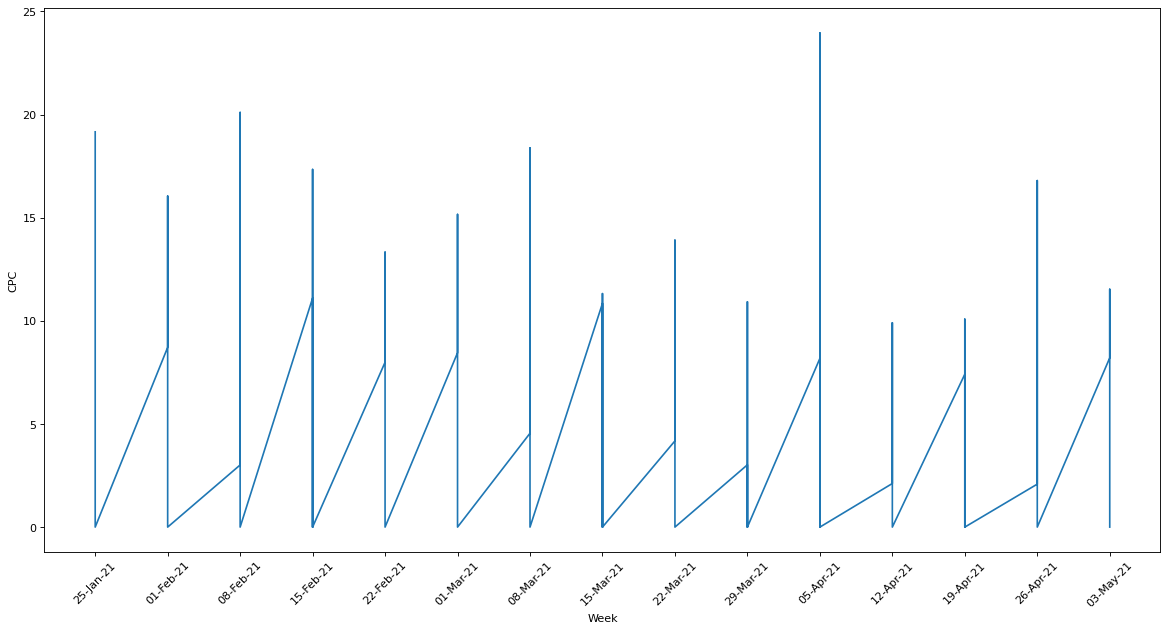

In [55]:

from matplotlib.pyplot import figure
figure(figsize=(18, 9), dpi=80)
plt.plot(ads['Week'],ads['CPC'])
plt.xticks(rotation=45)
plt.ylabel('CPC')
plt.xlabel('Week')
plt.show()

## Weekly Report on CTR

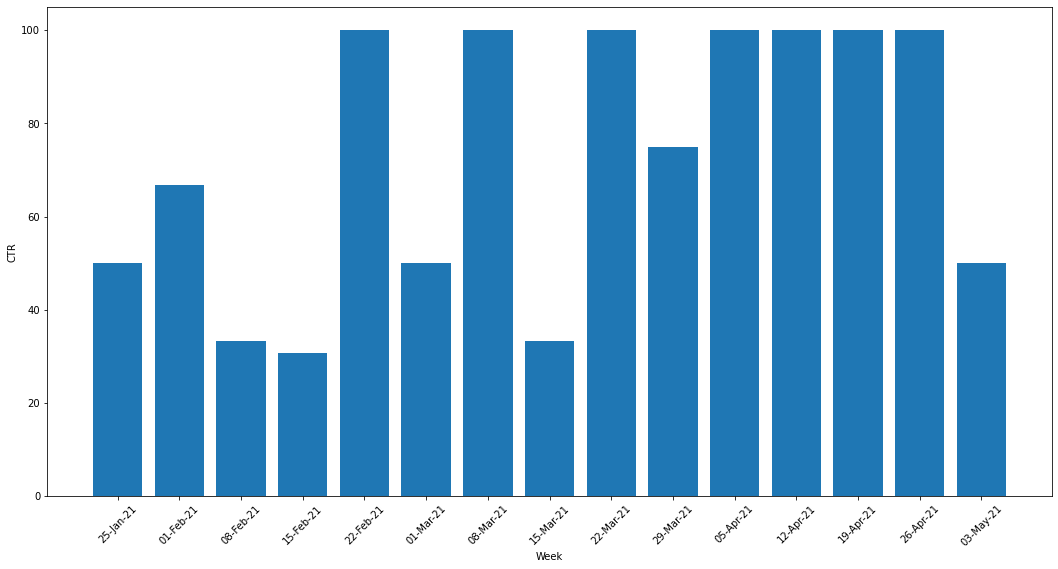

In [195]:

from matplotlib.pyplot import figure
figure(figsize=(18, 9))
plt.bar(ads['Week'],ads['CTR'])
plt.xticks(rotation=45)
plt.ylabel('CTR')
plt.xlabel('Week')
plt.show()

## Weekly Report on Clicks

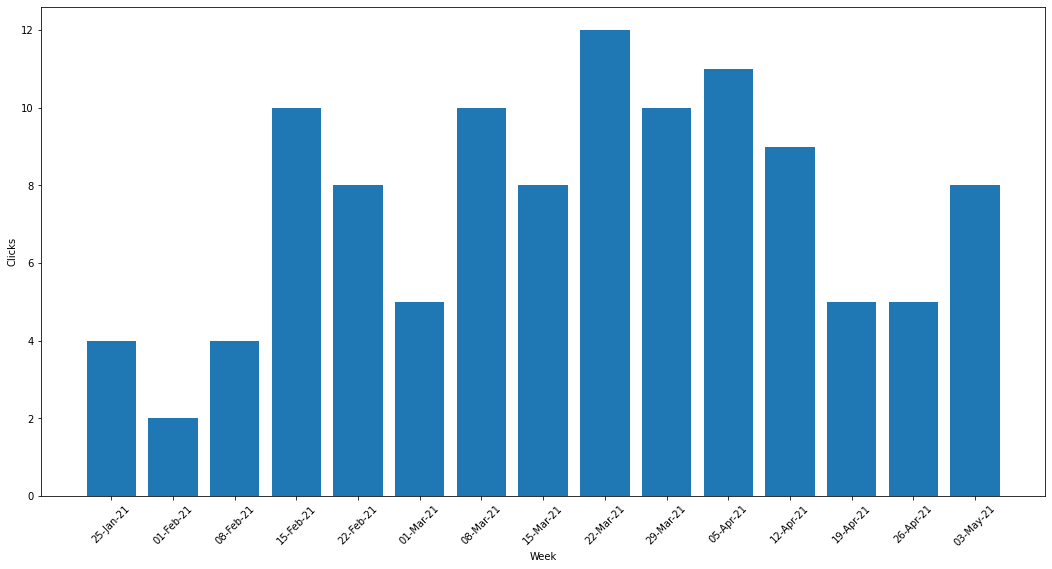

In [193]:
from matplotlib.pyplot import figure
figure(figsize=(18, 9))
plt.bar(ads['Week'],ads['Clicks'])
plt.xticks(rotation=45)
plt.ylabel('Clicks')
plt.xlabel('Week')
plt.show()


## Weekly Report on CPC

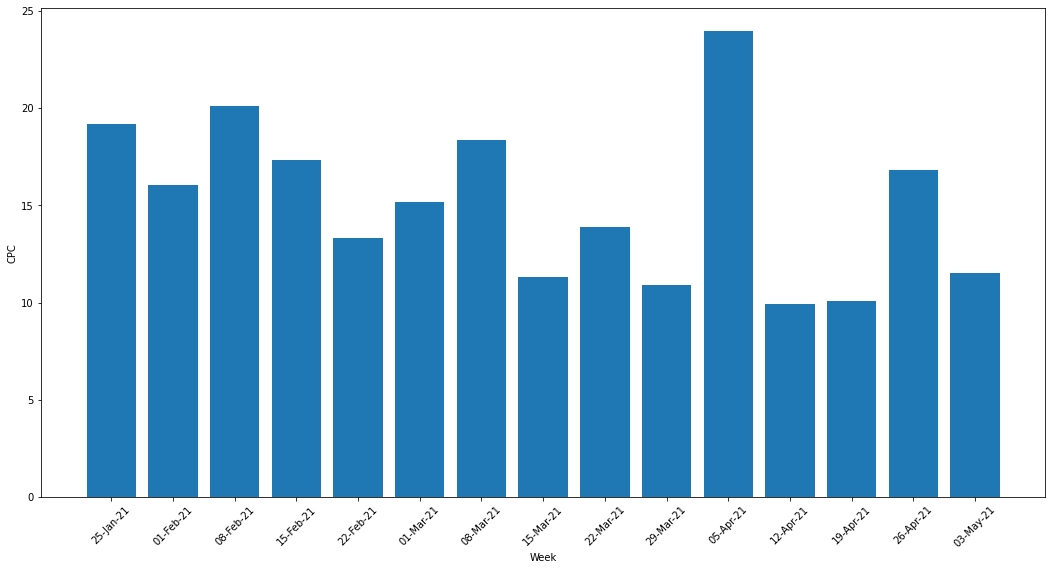

In [196]:
from matplotlib.pyplot import figure
figure(figsize=(18, 9))
plt.bar(ads['Week'],ads['CPC'])
plt.xticks(rotation=45)
plt.ylabel('CPC')
plt.xlabel('Week')
plt.show()


## Weekly Report on Impressions

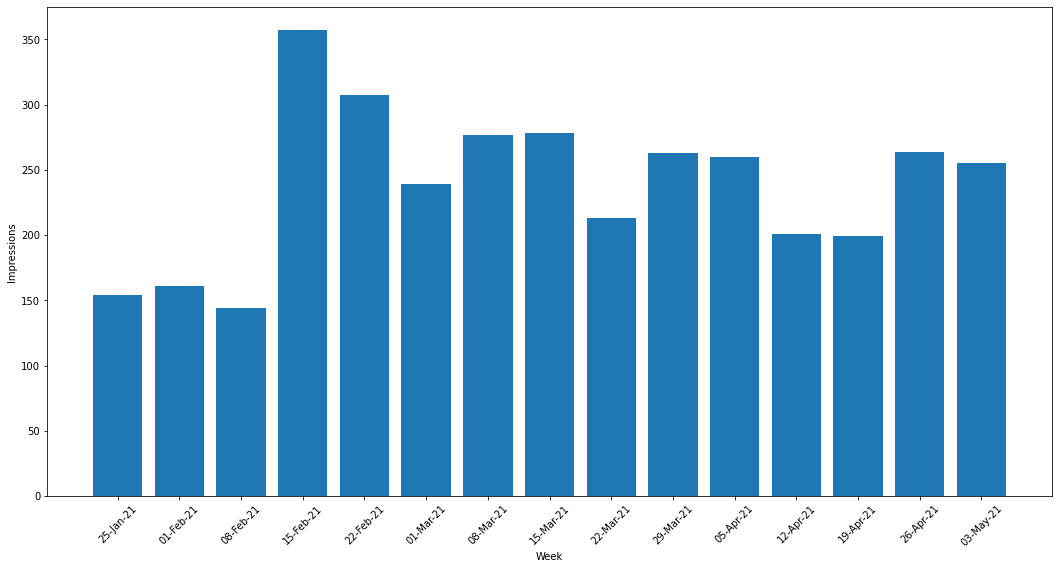

In [197]:
from matplotlib.pyplot import figure
figure(figsize=(18, 9))
plt.bar(ads['Week'],ads['Impressions'])
plt.xticks(rotation=45)
plt.ylabel('Impressions')
plt.xlabel('Week')
plt.show()

## Objective 2 : To find the  Most Profitable Channel

### Here since the payment was totally uncertain and contained a lot of missing values, CTR and CPC was found. 

### It is known that the most profitable channel will be the one with the higher CTR and lowest CPC.


In [233]:
ads['CTR'].max().col

100.0

In [240]:
col = ads['CTR']
max_x = ads.loc[ads['CTR'].idxmax()]
print( max_x)

Week                                           22-Feb-21
Campaign                             EK_Generic_Swimming
Ad_group          Swimming_Pool_Reservation_System_Exact
Keyword_type                                       Exact
Search_keyword          swimming pool reservation system
Clicks                                                 1
Impressions                                            1
Cost                                                4.64
Leads                                                  0
Prospects                                              0
CTR                                                100.0
CPC                                                 4.64
Weeks                                2021-02-22 00:00:00
Name: 121, dtype: object


## From Above we get to know that The Campaign of EK_Generic_Swimming has the highest number of CTR , Hence the Swimming Channel is analysed to be the most profitable channel

## Objecctive 3 : Which category/keyword is the most profitable ?

In [246]:
ads.Keyword_type.unique()

array(['Exact', 'Broad', 'Phrase'], dtype=object)

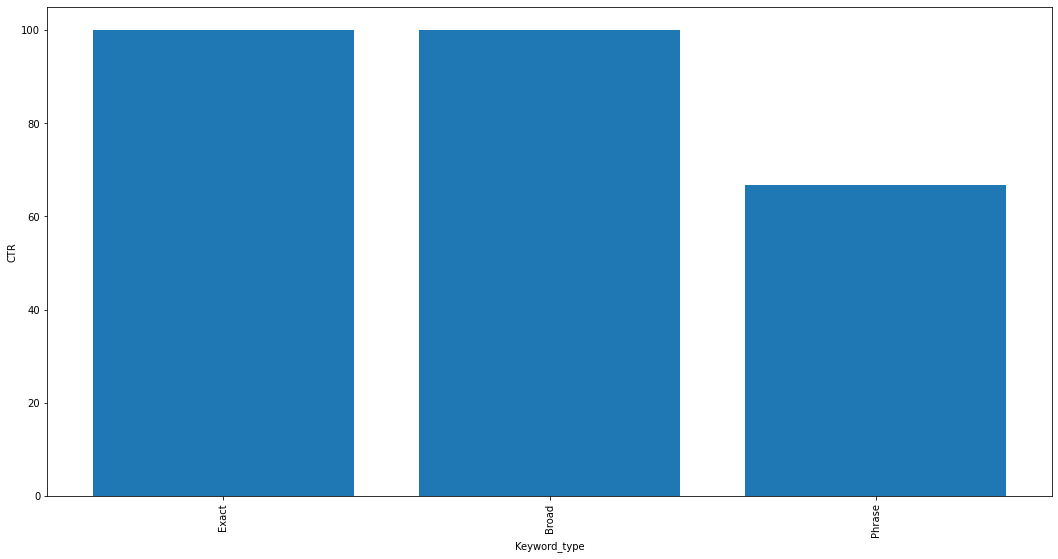

In [254]:

from matplotlib.pyplot import figure
figure(figsize=(18, 9))
plt.bar(ads['Keyword_type'],ads['CTR'])
plt.xticks(rotation=90)
plt.ylabel('CTR')
plt.xlabel('Keyword_type')
plt.show()

In [263]:
ads.groupby(["Keyword_type"]).sum().sort_values("CTR", ascending=False)


,Clicks,Impressions,Cost,Leads,Prospects,CTR,CPC
Keyword_type,,,,,,,
Exact,99,1060,580.33,6,5,1504.449449,326.052631
Broad,200,4476,1264.80,4,12,877.964900,312.758888
Phrase,88,1429,943.55,2,4,797.906543,551.840000


## From the above we get to know that the Keyword_Type "Broad" is the most profitable one as it has the highest Impressions and Clicks and a lower CPC compared to other Keywords

## Objective 4 : Look for insights by analyzing data points on time series graphs

In [267]:
ads.drop(columns={'Week'},inplace = True)
ads.head()

,Campaign,Ad_group,Keyword_type,Search_keyword,Clicks,Impressions,Cost,Leads,Prospects,CTR,CPC,Weeks
0,EK_Generic_Swimming,Pool_Reservation_System_Exact,Exact,pool reservation system,2,17,38.33,0,1,11.764706,19.1650,2021-01-25
1,EK_Generic_Swimming,Pool_Booking_App_Exact,Exact,pool booking app,1,13,11.70,0,0,7.692308,11.7000,2021-01-25
2,EK_Generic_Quad-Tok_Yoga,Yoga_Studio_Booking_Software_Broad,Broad,yoga studio booking software,4,154,45.13,0,1,2.597403,11.2825,2021-01-25
3,EK_Generic_Swimming,Pool_Scheduling_Software_Phrase,Phrase,pool scheduling software,2,8,23.91,0,0,25.000000,11.9550,2021-01-25
4,EK_Generic_Swimming_UK,Pool_Reservation_Software_Broad,Broad,pool reservation software,2,13,4.89,0,0,15.384615,2.4450,2021-01-25


### Time Series data has four aspects of behaviour Trend , Seasonality , Cycles and Unexplained Variation

## Below are the graphs that accounts for Time Series Analysis

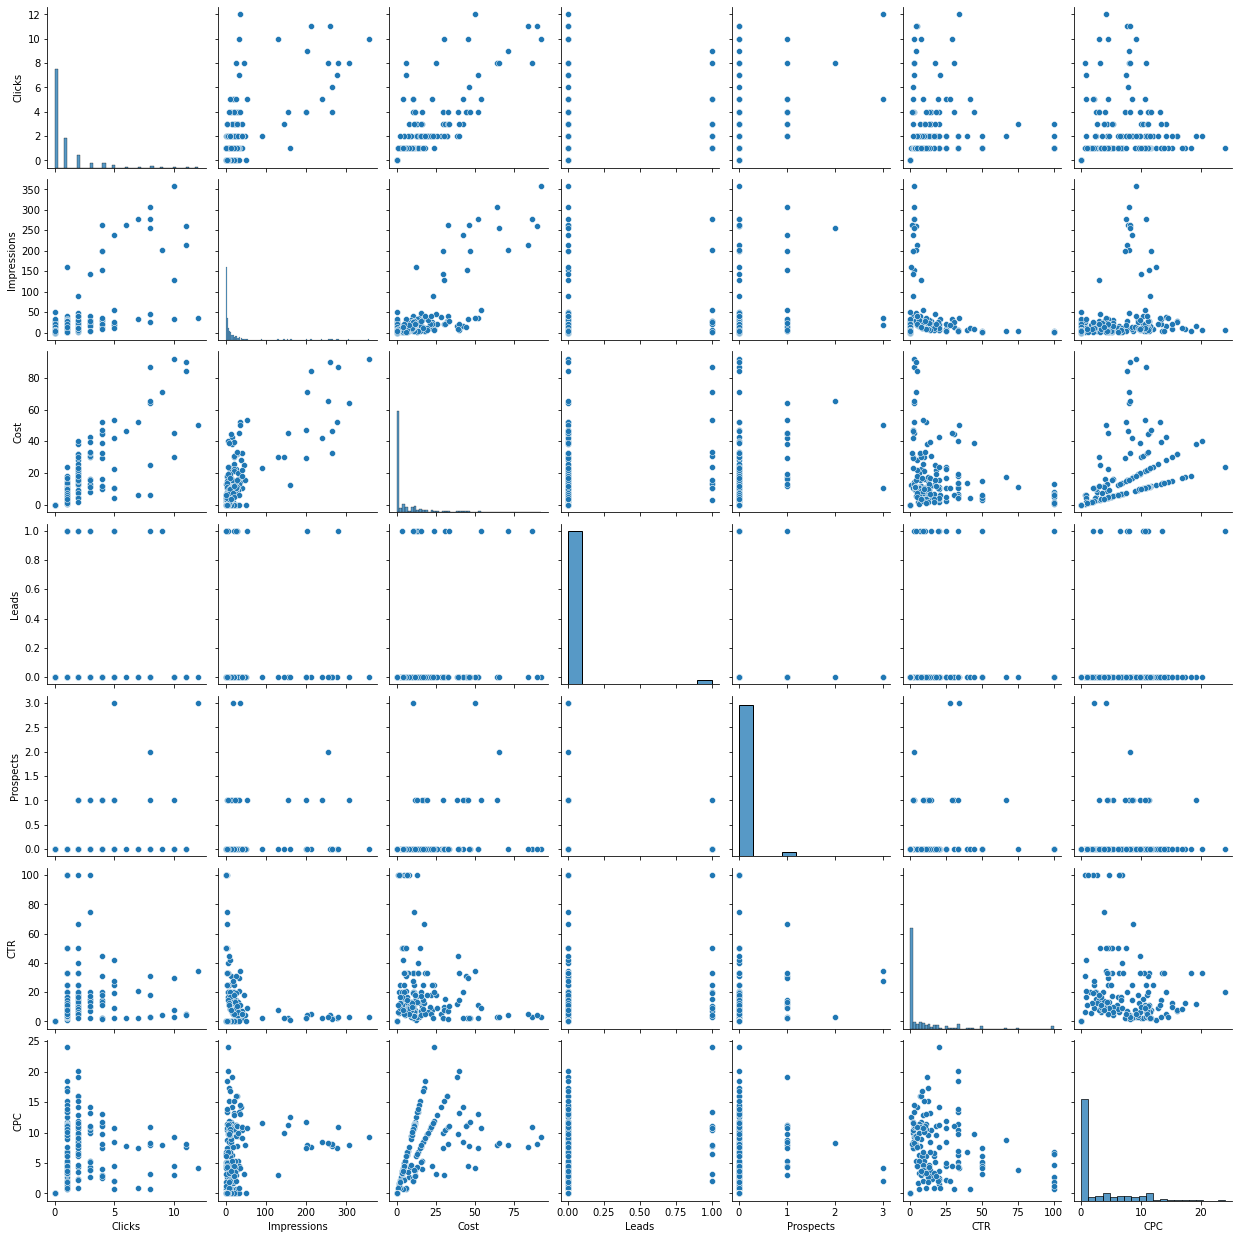

In [276]:
sns.pairplot(ads)
plt.show()

In [271]:
ads.corr()

,Clicks,Impressions,Cost,Leads,Prospects,CTR,CPC
Clicks,1.000000,0.711892,0.857770,0.225552,0.457910,0.283756,0.460805
Impressions,0.711892,1.000000,0.789016,0.138717,0.256429,-0.042539,0.352652
Cost,0.857770,0.789016,1.000000,0.288258,0.362452,0.183623,0.678868
Leads,0.225552,0.138717,0.288258,1.000000,0.019965,0.170895,0.262412
Prospects,0.457910,0.256429,0.362452,0.019965,1.000000,0.127139,0.159224
CTR,0.283756,-0.042539,0.183623,0.170895,0.127139,1.000000,0.340070
CPC,0.460805,0.352652,0.678868,0.262412,0.159224,0.340070,1.000000


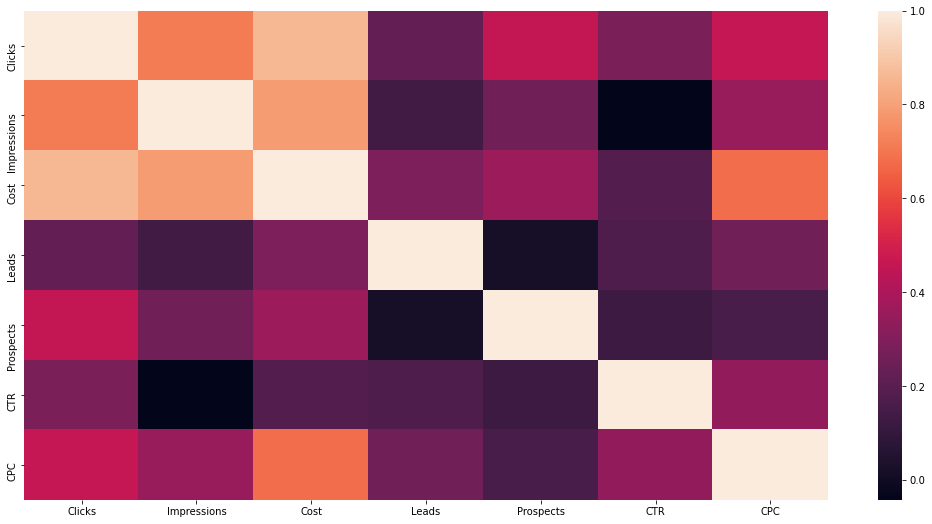

In [275]:

from matplotlib.pyplot import figure
figure(figsize=(18, 9))
sns.heatmap(ads.corr())
plt.show()

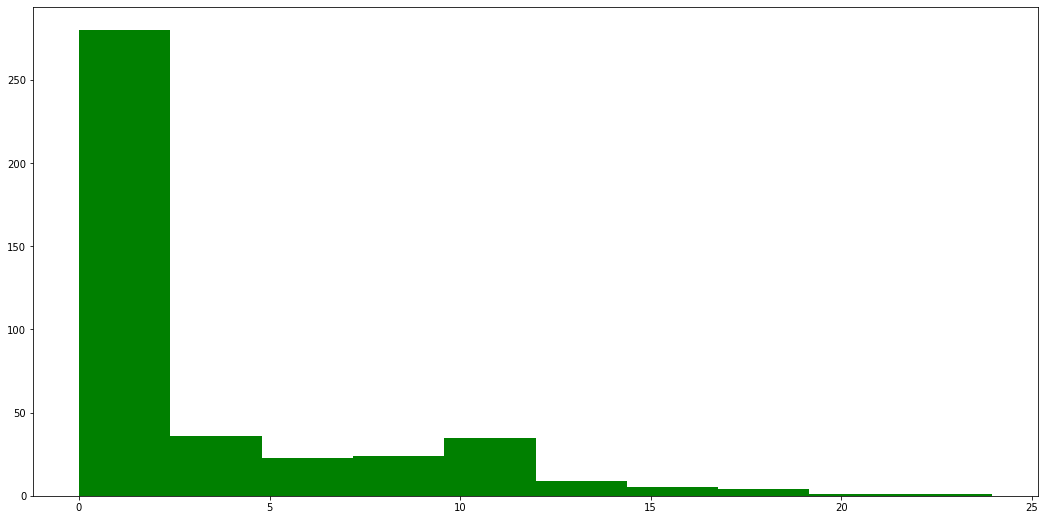

In [281]:
from matplotlib.pyplot import figure
figure(figsize=(18, 9))

plt.hist('CPC',data=ads,histtype='bar',color='green')
plt.show()

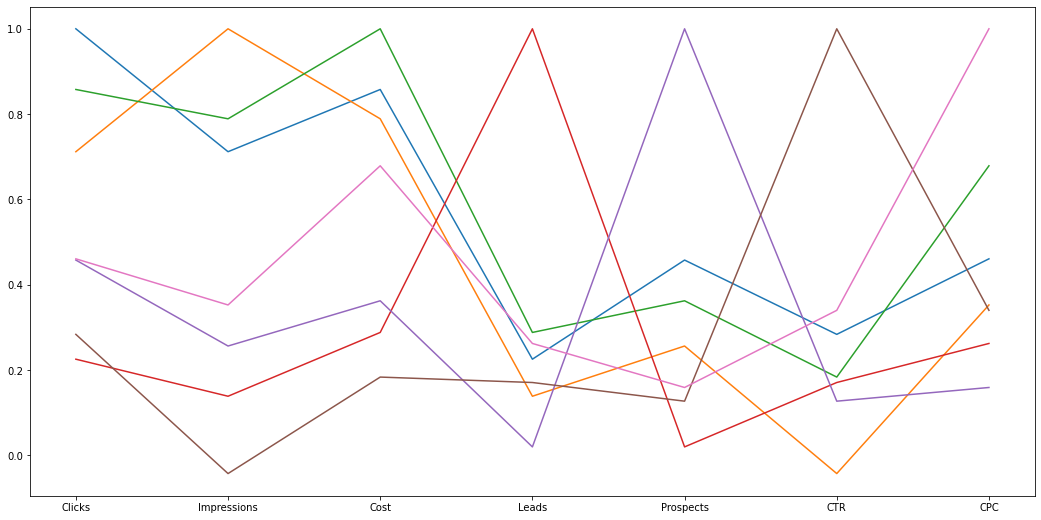

In [284]:
from matplotlib.pyplot import figure
figure(figsize=(18, 9))

plt.plot(ads.corr())
plt.show()

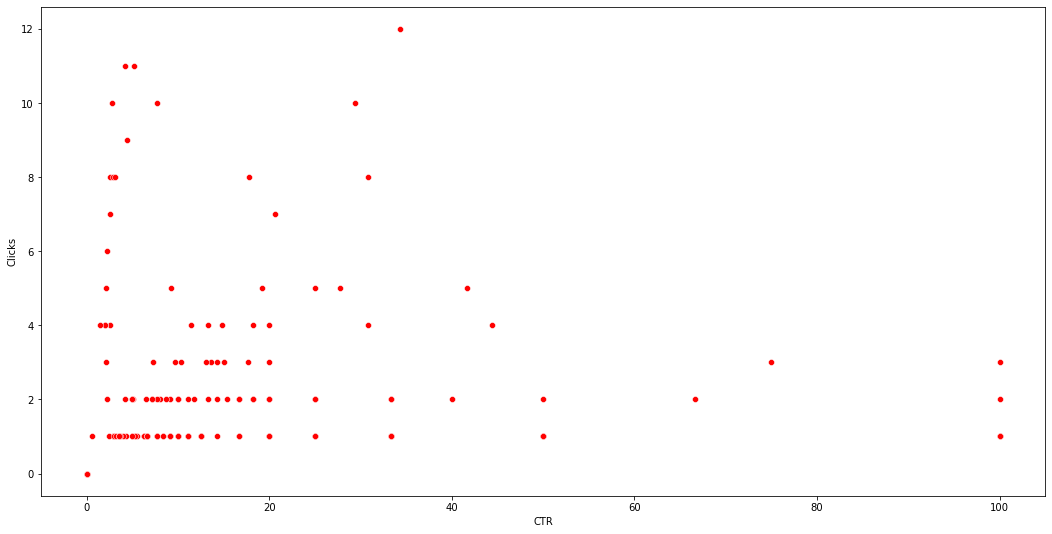

In [290]:
from matplotlib.pyplot import figure
figure(figsize=(18, 9))
sns.scatterplot(data=ads,x='CTR',y='Clicks',color='red')
plt.show()

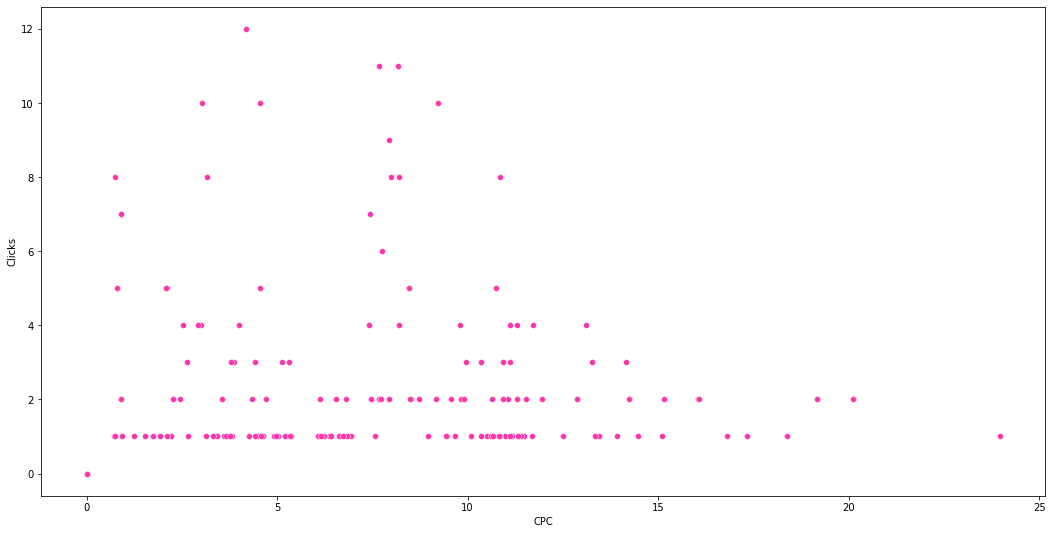

In [291]:
from matplotlib.pyplot import figure
figure(figsize=(18, 9))
sns.scatterplot(data=ads,x='CPC',y='Clicks',color='#FF36AB')
plt.show()

## Objective 5 : Analyse the Impact of Geography

In [292]:
ads.head()

,Campaign,Ad_group,Keyword_type,Search_keyword,Clicks,Impressions,Cost,Leads,Prospects,CTR,CPC,Weeks
0,EK_Generic_Swimming,Pool_Reservation_System_Exact,Exact,pool reservation system,2,17,38.33,0,1,11.764706,19.1650,2021-01-25
1,EK_Generic_Swimming,Pool_Booking_App_Exact,Exact,pool booking app,1,13,11.70,0,0,7.692308,11.7000,2021-01-25
2,EK_Generic_Quad-Tok_Yoga,Yoga_Studio_Booking_Software_Broad,Broad,yoga studio booking software,4,154,45.13,0,1,2.597403,11.2825,2021-01-25
3,EK_Generic_Swimming,Pool_Scheduling_Software_Phrase,Phrase,pool scheduling software,2,8,23.91,0,0,25.000000,11.9550,2021-01-25
4,EK_Generic_Swimming_UK,Pool_Reservation_Software_Broad,Broad,pool reservation software,2,13,4.89,0,0,15.384615,2.4450,2021-01-25


In [294]:
ads.Campaign.unique()

array(['EK_Generic_Swimming', 'EK_Generic_Quad-Tok_Yoga',
       'EK_Generic_Swimming_UK', 'EK_Generic_Swimming_Canada',
       'EK_Generic_Tri-Tok_Reservation',
       'EK_Generic_Quad-Tok_Yoga_Singapore',
       'EK_Generic_Tri-Tok_Reservation_Canada',
       'EK_Generic_Tri-Tok_Reservation_UK',
       'EK_Generic_Tri-Tok_Reservation_UAE',
       'EK_Generic_Tri-Tok_Reservation_Singapore',
       'EK_Generic_Quad-Tok_Pilates', 'EK_Generic_Tri-Tok_Yoga_Singapore',
       'EK_Generic_Tri-Tok_Pilates', 'EK_Generic_Tri-Tok_Yoga',
       'EK_Generic_Swimming_Singapore'], dtype=object)

In [309]:
ads.head()

,Campaign,Ad_group,Keyword_type,Search_keyword,Clicks,Impressions,Cost,Leads,Prospects,CTR,CPC,Weeks,keyword
0,EK_Generic_Swimming,Pool_Reservation_System_Exact,Exact,pool reservation system,2,17,38.33,0,1,11.764706,19.1650,2021-01-25,None
1,EK_Generic_Swimming,Pool_Booking_App_Exact,Exact,pool booking app,1,13,11.70,0,0,7.692308,11.7000,2021-01-25,None
2,EK_Generic_Quad-Tok_Yoga,Yoga_Studio_Booking_Software_Broad,Broad,yoga studio booking software,4,154,45.13,0,1,2.597403,11.2825,2021-01-25,None
3,EK_Generic_Swimming,Pool_Scheduling_Software_Phrase,Phrase,pool scheduling software,2,8,23.91,0,0,25.000000,11.9550,2021-01-25,None
4,EK_Generic_Swimming_UK,Pool_Reservation_Software_Broad,Broad,pool reservation software,2,13,4.89,0,0,15.384615,2.4450,2021-01-25,None


In [308]:
ads.drop(columns={'UK','UAE','Singapore','Canada'},inplace = True)

In [310]:
ads.drop(columns={'keyword'},inplace = True)

In [311]:
ads.head()

,Campaign,Ad_group,Keyword_type,Search_keyword,Clicks,Impressions,Cost,Leads,Prospects,CTR,CPC,Weeks
0,EK_Generic_Swimming,Pool_Reservation_System_Exact,Exact,pool reservation system,2,17,38.33,0,1,11.764706,19.1650,2021-01-25
1,EK_Generic_Swimming,Pool_Booking_App_Exact,Exact,pool booking app,1,13,11.70,0,0,7.692308,11.7000,2021-01-25
2,EK_Generic_Quad-Tok_Yoga,Yoga_Studio_Booking_Software_Broad,Broad,yoga studio booking software,4,154,45.13,0,1,2.597403,11.2825,2021-01-25
3,EK_Generic_Swimming,Pool_Scheduling_Software_Phrase,Phrase,pool scheduling software,2,8,23.91,0,0,25.000000,11.9550,2021-01-25
4,EK_Generic_Swimming_UK,Pool_Reservation_Software_Broad,Broad,pool reservation software,2,13,4.89,0,0,15.384615,2.4450,2021-01-25


In [356]:
keywords= ['UK', 'Singapore', 'Canada','UAE']

ads['Region'] = ads['Campaign'].str.findall('|'.join(keywords)).apply(set).str.join(',')
ads.head()

,Campaign,Ad_group,Keyword_type,Search_keyword,Clicks,Impressions,Cost,Leads,Prospects,CTR,CPC,Weeks,Region
0,EK_Generic_Swimming,Pool_Reservation_System_Exact,Exact,pool reservation system,2,17,38.33,0,1,11.764706,19.1650,2021-01-25,
1,EK_Generic_Swimming,Pool_Booking_App_Exact,Exact,pool booking app,1,13,11.70,0,0,7.692308,11.7000,2021-01-25,
2,EK_Generic_Quad-Tok_Yoga,Yoga_Studio_Booking_Software_Broad,Broad,yoga studio booking software,4,154,45.13,0,1,2.597403,11.2825,2021-01-25,
3,EK_Generic_Swimming,Pool_Scheduling_Software_Phrase,Phrase,pool scheduling software,2,8,23.91,0,0,25.000000,11.9550,2021-01-25,
4,EK_Generic_Swimming_UK,Pool_Reservation_Software_Broad,Broad,pool reservation software,2,13,4.89,0,0,15.384615,2.4450,2021-01-25,UK


In [360]:
print(ads.replace(r'^\s*$', np.nan, regex=True))
ads.head(20)

                           Campaign                                  Ad_group  \
0               EK_Generic_Swimming             Pool_Reservation_System_Exact   
1               EK_Generic_Swimming                    Pool_Booking_App_Exact   
2          EK_Generic_Quad-Tok_Yoga        Yoga_Studio_Booking_Software_Broad   
3               EK_Generic_Swimming           Pool_Scheduling_Software_Phrase   
4            EK_Generic_Swimming_UK           Pool_Reservation_Software_Broad   
..                              ...                                       ...   
413             EK_Generic_Swimming           Pool_Reservation_Software_Broad   
414        EK_Generic_Quad-Tok_Yoga        Yoga_Studio_Booking_Software_Exact   
415  EK_Generic_Tri-Tok_Reservation       Reservation_Management_System_Exact   
416     EK_Generic_Quad-Tok_Pilates     Pilates_Studio_Booking_Software_Broad   
417     EK_Generic_Quad-Tok_Pilates  Pilates_Studio_Management_Software_Exact   

    Keyword_type           

,Campaign,Ad_group,Keyword_type,Search_keyword,Clicks,Impressions,Cost,Leads,Prospects,CTR,CPC,Weeks,Region
0,EK_Generic_Swimming,Pool_Reservation_System_Exact,Exact,pool reservation system,2,17,38.33,0,1,11.764706,19.1650,2021-01-25,
1,EK_Generic_Swimming,Pool_Booking_App_Exact,Exact,pool booking app,1,13,11.70,0,0,7.692308,11.7000,2021-01-25,
2,EK_Generic_Quad-Tok_Yoga,Yoga_Studio_Booking_Software_Broad,Broad,yoga studio booking software,4,154,45.13,0,1,2.597403,11.2825,2021-01-25,
3,EK_Generic_Swimming,Pool_Scheduling_Software_Phrase,Phrase,pool scheduling software,2,8,23.91,0,0,25.000000,11.9550,2021-01-25,
4,EK_Generic_Swimming_UK,Pool_Reservation_Software_Broad,Broad,pool reservation software,2,13,4.89,0,0,15.384615,2.4450,2021-01-25,UK
5,EK_Generic_Swimming_Canada,Pool_Reservation_Software_Broad,Broad,pool reservation software,1,2,4.93,0,0,50.000000,4.9300,2021-01-25,Canada
6,EK_Generic_Swimming,Pool_Reservation_Software_Exact,Exact,pool reservation software,1,3,13.44,1,0,33.333333,13.4400,2021-01-25,
7,EK_Generic_Tri-Tok_Reservation,Reservation_Management_System_Phrase,Phrase,reservation management system,1,9,6.08,0,0,11.111111,6.0800,2021-01-25,
8,EK_Generic_Quad-Tok_Yoga_Singapore,Yoga_Studio_Booking_Software_Broad,Broad,yoga studio booking software,1,3,6.38,0,0,33.333333,6.3800,2021-01-25,Singapore
9,EK_Generic_Tri-Tok_Reservation,Reservation_Management_System_Exact,Exact,reservation management system,0,14,0.00,0,0,0.000000,0.0000,2021-01-25,


In [362]:
ads.isna().sum()

Campaign          0
Ad_group          0
Keyword_type      0
Search_keyword    0
Clicks            0
Impressions       0
Cost              0
Leads             0
Prospects         0
CTR               0
CPC               0
Weeks             0
Region            0
dtype: int64

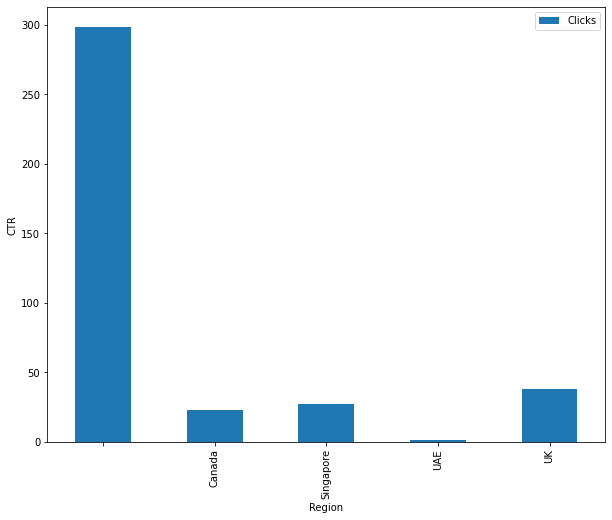

In [347]:
plt.rcParams["figure.figsize"] = (10,8)
ads_region = ads[["Region", "Clicks"]]
ads_region.groupby("Region").sum().plot(kind="bar") 
plt.xticks(rotation=90)
plt.ylabel('CTR')
plt.xlabel('Region')
plt.show()

## From the above graph we get to know that the CTR is higher in other regions when compared to 'UK', 'Singapore', 'Canada','UAE'.
## If the Other regions can be neglected then UK stands on top when it comes to highest CTR

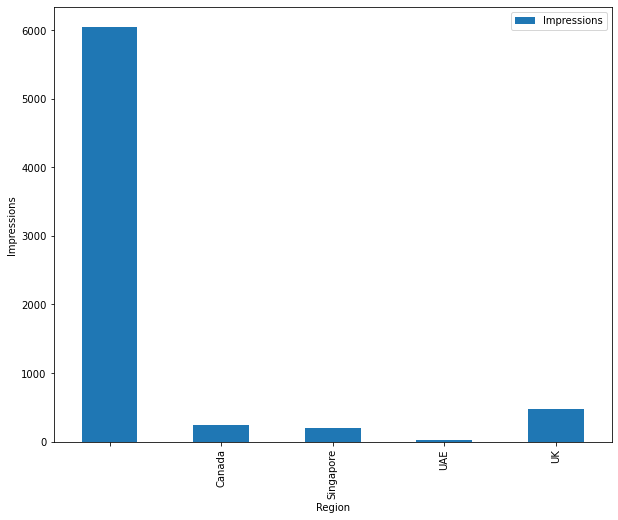

In [366]:
plt.rcParams["figure.figsize"] = (10,8)
ads_region = ads[["Region", "Impressions"]]
ads_region.groupby("Region").sum().plot(kind="bar") 
plt.xticks(rotation=90)
plt.ylabel('Impressions')
plt.xlabel('Region')
plt.show()

## Even the Other Region has a better rate on Impressions. If that is neglcted , UK still stands on the top when it comes to Impressions as well.

In [368]:
ads.to_csv('OAIT_out.csv')